<Figure size 432x288 with 0 Axes>

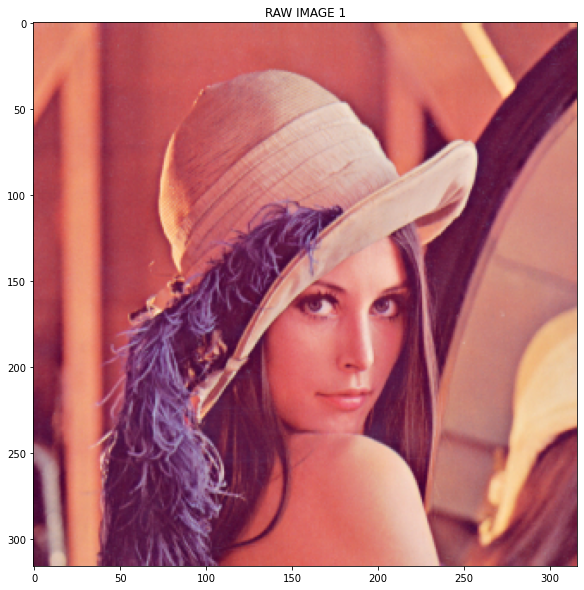

<Figure size 432x288 with 0 Axes>

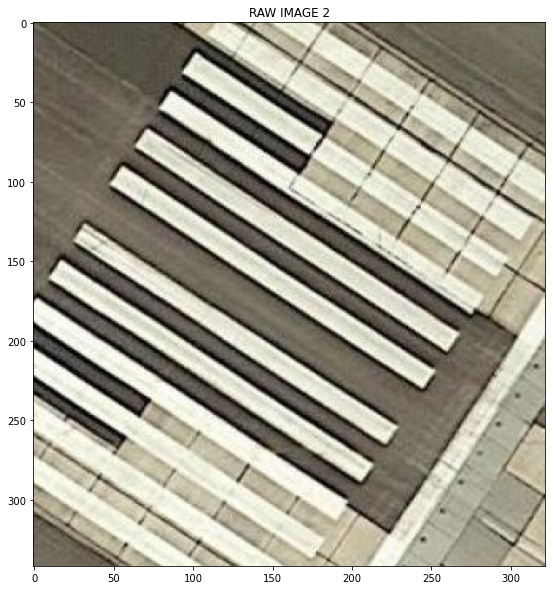

In [12]:
import itertools
from skimage import io,color
from matplotlib import pyplot as plt
import math
import cv2
import numpy as np

#Reading the image in
path1 = "C:/Users/HIBIKI/Desktop/New_LAB612_Training/Week2/test_images/Lenna.jpg"
path2 = "C:/Users/HIBIKI/Desktop/New_LAB612_Training/Week2/test_images/img.png"
raw_img1 = io.imread(path1)
raw_img2 = io.imread(path2)
plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("RAW IMAGE 1")
plt.imshow(raw_img1)
plt.show()

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("RAW IMAGE 2")
plt.imshow(raw_img2)
plt.show()

#Average,Gaussian and Median are LPFs

--------------------Testing Average Filter----------------------



<Figure size 432x288 with 0 Axes>

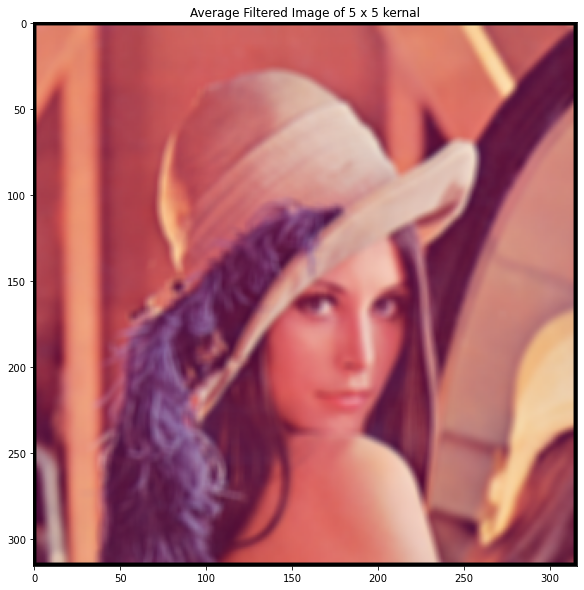

<Figure size 432x288 with 0 Axes>

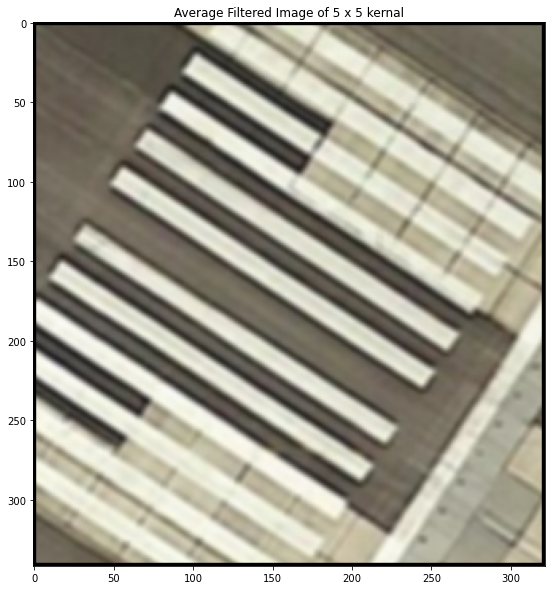

In [13]:
#Average Filter with nxn kernal
def average_filter(raw_img,kernal_size):  # sourcery skip: avoid-builtin-shadow
    k_s = kernal_size
    #Number of rows and columns of the image
    m,n,c = raw_img.shape

    #Creating average kernal
    kernal = np.ones([kernal_size,kernal_size],dtype=int)
    sum = np.size(kernal)
    kernal = kernal/sum

    #The place holder for filtered image
    img_filtered = np.zeros_like(raw_img)

    #conv
    for i in range(int(k_s/2),m-int(k_s/2)):
        for j in range(int(k_s/2),n-int(k_s/2)):
            conv = 0
            for k, l in itertools.product(range(k_s), range(k_s)):
                conv += kernal[k,l] * raw_img[i - int(k_s/2) + k,j - int(k_s/2) + l]

            img_filtered[i,j] = conv

    img_filtered = img_filtered.astype(np.uint8)

    return img_filtered

print("--------------------Testing Average Filter----------------------\n")
kernal_size = 5
avg_img1 = average_filter(raw_img1,kernal_size)
plt.figure(1)
plt.figure(figsize=(10, 10))
plt.title(f"Average Filtered Image of {kernal_size} x {kernal_size} kernal")
plt.imshow(avg_img1)
plt.show()

kernal_size = 5
avg_img2 = average_filter(raw_img2,kernal_size)
plt.figure(1)
plt.figure(figsize=(10, 10))
plt.title(f"Average Filtered Image of {kernal_size} x {kernal_size} kernal")
plt.imshow(avg_img2)
plt.show()

----------Testing Gaussian Filter-------



<Figure size 432x288 with 0 Axes>

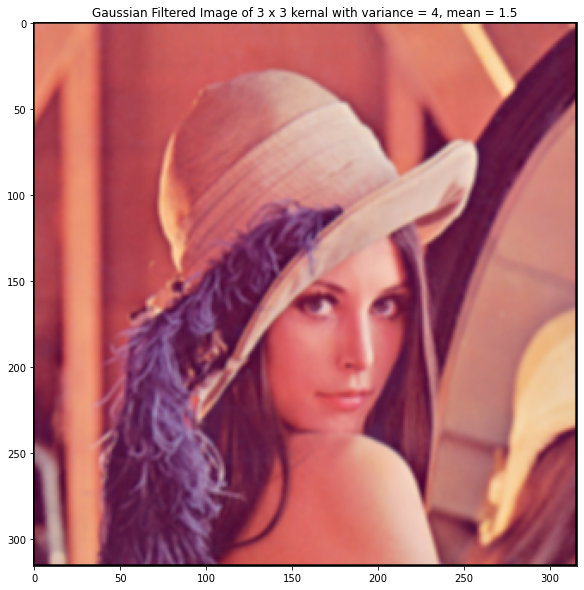

<Figure size 432x288 with 0 Axes>

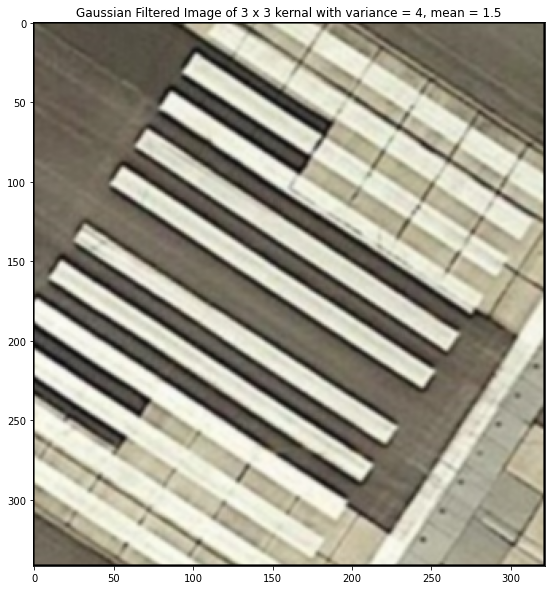

In [14]:
# Gaussian Filter
# Note 2D gaussian is costy, actually, we would like to exploit seperabilty in Gaussian filter,
# i.e. spliting a 2D gaussian kernal
# into 2 1D gaussian filters
def gaussian_filter(raw_img,sigma,mu,kernal_size):
    # sourcery skip: avoid-builtin-shadow
    img_result = np.zeros_like(raw_img)
    #Number of rows and columns of the image
    m,n,c = raw_img.shape
    k_s = kernal_size

    #Creating a k x k Gaussian Mask
    gaussian_kernal = np.zeros((k_s,k_s),np.float32)
    for i in range(k_s):
        for j in range(k_s):
            norm = math.pow(i-mu,2) + math.pow(j-mu,2)
            gaussian_kernal[i,j] = math.exp(-norm/(2*math.pow(sigma,2)))/2*math.pi*pow(sigma,2)

    sum = np.sum(gaussian_kernal)
    gaussian_kernal = gaussian_kernal/sum

    #Apply the filter to the raw_image, conv img with filter
    for i in range(int(k_s/2) , m-int(k_s/2)):
        for j in range(int(k_s/2) , n-int(k_s/2)):
            conv = 0
            for k, l in itertools.product(range(k_s), range(k_s)):
                conv += raw_img[i-int(k_s/2) + k, j- int(k_s/2) + l] * gaussian_kernal[k,l]

            img_result[i,j] = conv

    return img_result

print("----------Testing Gaussian Filter-------\n")
kernal_size = 3
mean = 1.5
var = 4

gau_filtered_img1 = gaussian_filter(raw_img1,var,mean,kernal_size)
plt.figure(2)
plt.figure(figsize=(10, 10))
plt.title(f"Gaussian Filtered Image of {kernal_size} x {kernal_size} kernal with variance = {var}, mean = {mean}")
plt.imshow(gau_filtered_img1)
plt.show()

gau_filtered_img2 = gaussian_filter(raw_img2,var,mean,kernal_size)
plt.figure(2)
plt.figure(figsize=(10, 10))
plt.title(f"Gaussian Filtered Image of {kernal_size} x {kernal_size} kernal with variance = {var}, mean = {mean}")
plt.imshow(gau_filtered_img2)
plt.show()

----------Testing Median Filter-------



<Figure size 432x288 with 0 Axes>

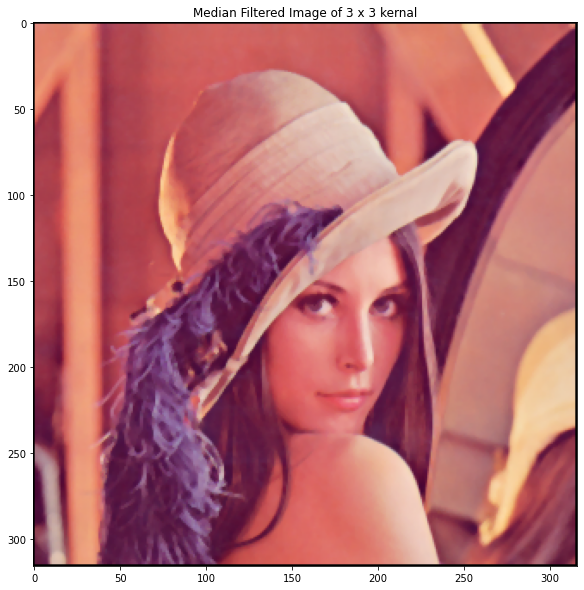

<Figure size 432x288 with 0 Axes>

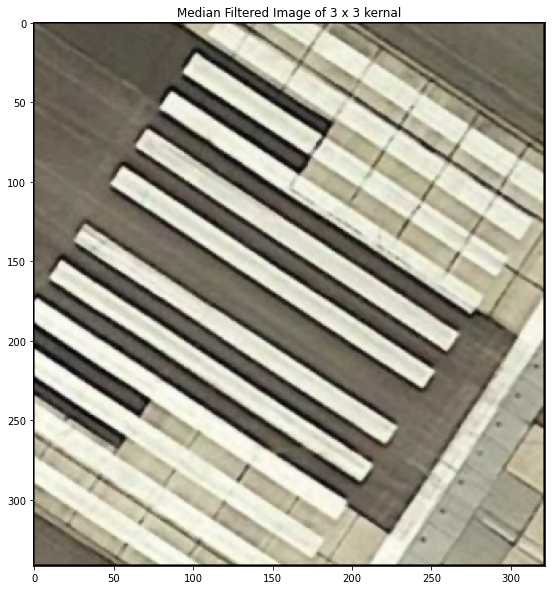

In [15]:
#Median Filter
#Good at removing salt and pepper noise from the image, a non-linear filter
# However with the cost of blurring in detail, to combat this effect, another filter is proposed
# Bilateral filter is a non-linear filter that combines the features of gaussian and median filter!
def median_filter(raw_img, kernal_size):
    img_result = np.zeros_like(raw_img)

    #Number of rows and columns of the image
    m,n,c = raw_img.shape
    k_s = kernal_size

    #Applying filter to the image
    for i in range(int(k_s/2) , m - int(k_s/2) ):
        for j in range(int(k_s/2) , n - int(k_s/2)):
            #Find the median by extracting components out from the image within the kernal
            kernal = np.zeros((k_s,k_s,3),np.float32)
            for k in range(k_s):
                for l in range(k_s):
                    kernal[k,l] = raw_img[i-int(k_s/2) + k, j- int(k_s/2) + l]

            kernal_r = kernal[:,:,0]
            kernal_g = kernal[:,:,1]
            kernal_b = kernal[:,:,2]

            kernal_r = kernal_r.flatten()
            kernal_g = kernal_g.flatten()
            kernal_b = kernal_b.flatten()

            median_r = sorted(kernal_r)[len(kernal_r) // 2]
            median_g = sorted(kernal_g)[len(kernal_g) // 2]
            median_b = sorted(kernal_b)[len(kernal_b) // 2]

            img_result[i,j] = [median_r,median_g,median_b]

    img_result = img_result.astype(np.uint8)

    return img_result

print("----------Testing Median Filter-------\n")
kernal_size = 3

median_filtered_img1 = median_filter(raw_img1,kernal_size)
plt.figure(3)
plt.figure(figsize=(10, 10))
plt.title(f"Median Filtered Image of {kernal_size} x {kernal_size} kernal")
plt.imshow(median_filtered_img1)
plt.show()

median_filtered_img2 = median_filter(raw_img2,kernal_size)
plt.figure(3)
plt.figure(figsize=(10, 10))
plt.title(f"Median Filtered Image of {kernal_size} x {kernal_size} kernal")
plt.imshow(median_filtered_img2)
plt.show()

----------Reading Grey Scale Image-------



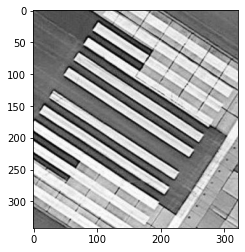

----------Testing Sobel Filter-------



<Figure size 432x288 with 0 Axes>

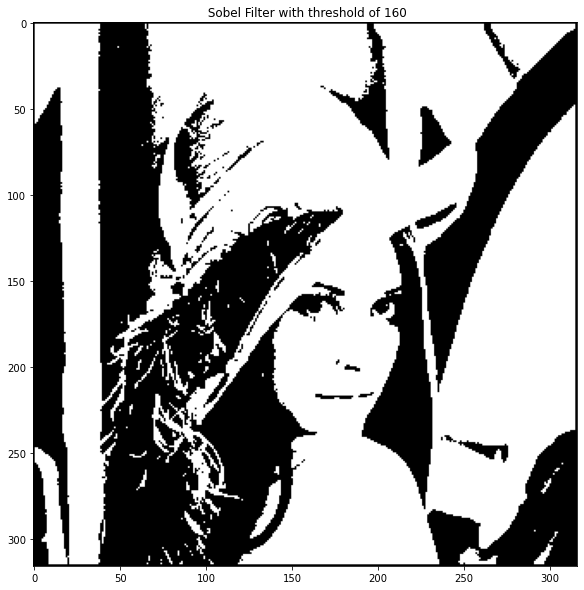

<Figure size 432x288 with 0 Axes>

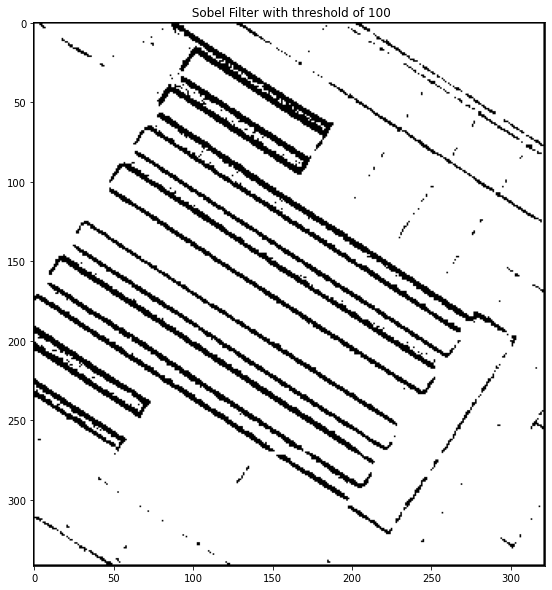

In [16]:
#Spatial Filter for Edge detection, sobel is a grayscale operator which detects the gradients using 2 kernals of Gx & Gy
#Sobel Filter,implemented to find gradients,which use sobel operator
#First Convolve with 2 Sobel opearator in Gx and Gy then find the norm of them by setting the threshold value
#In practice, we usually pass through gaussian filter before really using sobel filter
def Sobel_filter(grey_img,threshold):
    k_s = 3
    Gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    Gx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

    processed_img = np.zeros_like(grey_img)
    m,n = grey_img.shape

    for i in range(k_s//2,m-(k_s//2)):
        for j in range(k_s//2,n-(k_s//2)):
            grad_Y = 0
            grad_X = 0
            for k, l in itertools.product(range(k_s), range(k_s)):
                grad_Y += Gy[k,l] * grey_img[i - k_s//2 + k ,j - k//2 + l]
                grad_X += Gx[k,l] * grey_img[i - k_s//2 + k ,j - k//2 + l]

            processed_img[i,j] = 255 if (((grad_X**2 + grad_Y**2) ** (1/2)) > threshold) else 0

    return processed_img

print("----------Reading Grey Scale Image-------\n")
#Reading grey image in
path1 = "C:/Users/HIBIKI/Desktop/New_LAB612_Training/Week2/test_images/Lenna.jpg"
path2 = "C:/Users/HIBIKI/Desktop/New_LAB612_Training/Week2/test_images/img.png"
grey_img1 = cv2.imread(path1,0)
grey_img2 = cv2.imread(path2,0)
plt.imshow(grey_img1,cmap = 'gray')
plt.imshow(grey_img2,cmap = 'gray')
plt.show()

threshold = 160
print(f"----------Testing Sobel Filter-------\n")
sobel_filtered_img1 = Sobel_filter(grey_img1,threshold)
plt.figure(4)
plt.figure(figsize=(10, 10))
plt.title(f" Sobel Filter with threshold of {threshold}")
plt.imshow(sobel_filtered_img1,cmap = 'gray')
plt.show()

threshold = 100
sobel_filtered_img2 = Sobel_filter(grey_img2,threshold)
plt.figure(4)
plt.figure(figsize=(10, 10))
plt.title(f" Sobel Filter with threshold of {threshold}")
plt.imshow(sobel_filtered_img2,cmap = 'gray')
plt.show()

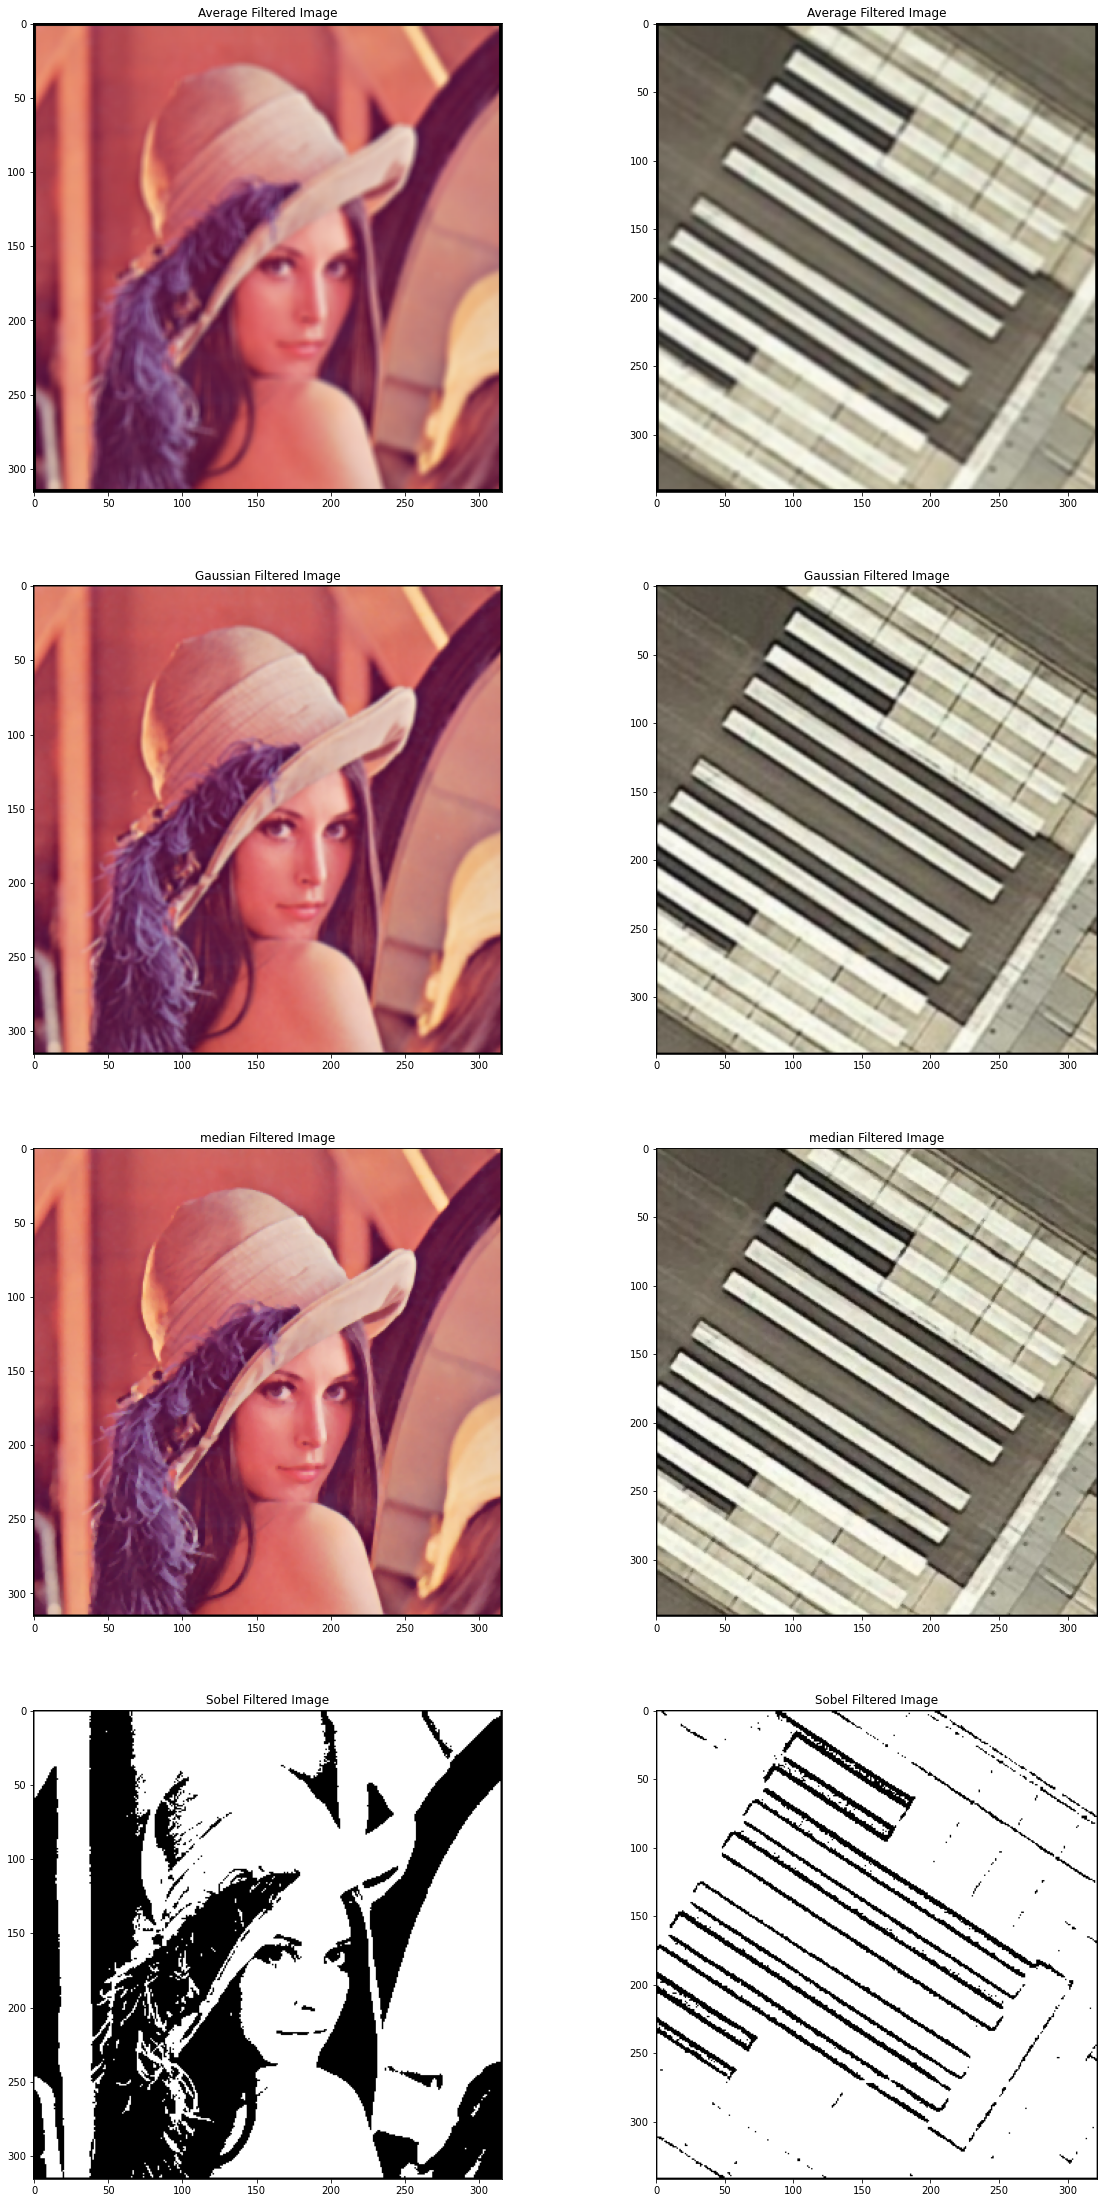

In [17]:
fig = plt.figure(figsize=(20, 50))

ax3 = fig.add_subplot(521)
ax3.imshow(avg_img1)
ax3.title.set_text(f'Average Filtered Image')

ax4 = fig.add_subplot(522)
ax4.imshow(avg_img2)
ax4.title.set_text(f'Average Filtered Image')

ax5 = fig.add_subplot(523)
ax5.imshow(gau_filtered_img1)
ax5.title.set_text(f'Gaussian Filtered Image')

ax6 = fig.add_subplot(524)
ax6.imshow(gau_filtered_img2)
ax6.title.set_text(f'Gaussian Filtered Image')

ax7 = fig.add_subplot(525)
ax7.imshow(median_filtered_img1)
ax7.title.set_text(f'median Filtered Image')

ax8 = fig.add_subplot(526)
ax8.imshow(median_filtered_img2)
ax8.title.set_text(f'median Filtered Image')

ax9 = fig.add_subplot(527)
ax9.imshow(sobel_filtered_img1,cmap = 'gray')
ax9.title.set_text(f'Sobel Filtered Image')

ax10 = fig.add_subplot(528)
ax10.imshow(sobel_filtered_img2,cmap = 'gray')
ax10.title.set_text(f'Sobel Filtered Image')


plt.show()